In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Set training and test data path.
train_dir = pathlib.Path("../data1/train/")
test_dir = pathlib.Path("../data1/test/")

train_count = len(list(train_dir.glob("*/*.jpg")))
test_count = len(list(test_dir.glob("*/*.jpg")))

print(train_count)
print(test_count)

498
500


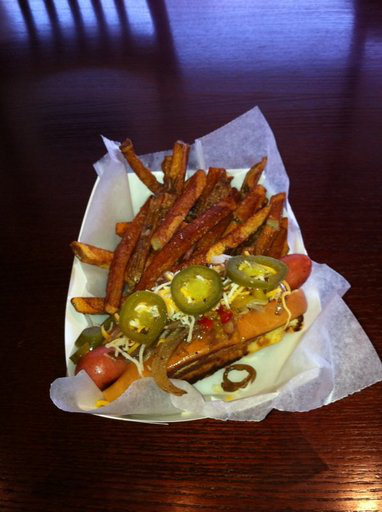

In [3]:
# Example of hot dog image.
hotdogs = list(test_dir.glob("hotdog/*.jpg"))
PIL.Image.open(str(hotdogs[0]))

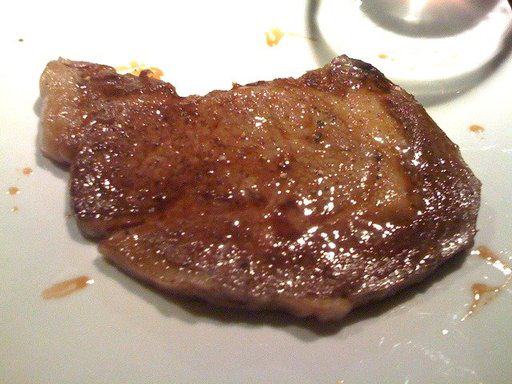

In [4]:
# Example of not hot dog image.
not_hotdogs = list(test_dir.glob("not_hotdog/*.jpg"))
PIL.Image.open(str(not_hotdogs[0]))

In [5]:
# Define image and batch size.
batch_size = 25
img_height = 256
img_width = 256

In [6]:
# Generate training set (80% of training data).
# Resize image to 256 x 256.
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 498 files belonging to 2 classes.
Using 399 files for training.


In [7]:
# Generate validation set (20% of training data.)
# Resize image to 256 x 256.
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 498 files belonging to 2 classes.
Using 99 files for validation.


In [8]:
# Define label names.
label_names = ["hot dog", "not hot dog"]
print(label_names)

['hot dog', 'not hot dog']


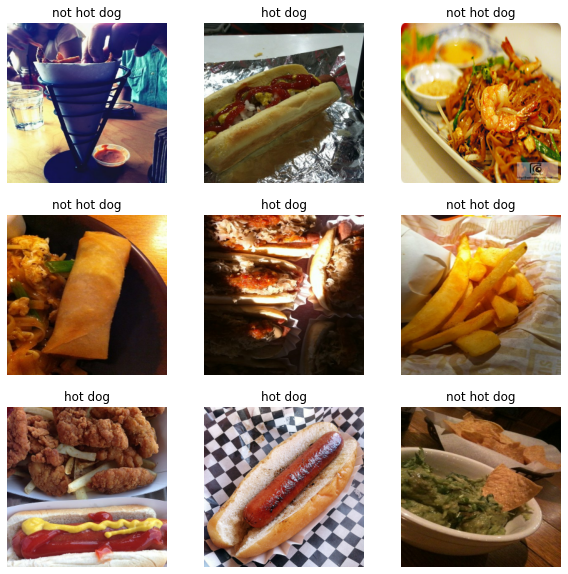

In [9]:
# Example of images from training set with corresponding labels.
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(label_names[labels[i]])
        plt.axis("off")

In [10]:
# Cache and shuffle training and validation set.
# Prefetch allows model to read in next set of data in step (s + 1) while it is currently executing current training step (s).
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_set = validation_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
# Define general convolutional neural network.
num_classes = 2
model = Sequential([
    # Rescaling image from [0-255] to [0.0-1.0].
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # 16 output channels (3 -> 16), 3 x 3 kernel size.
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    # 256 x 256 -> 128 x 128
    layers.MaxPooling2D(),
    # 32 output channels (16 -> 32), 3 x 3 kernel size.
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    # 128 x 128 -> 64 x 64
    layers.MaxPooling2D(),
    # 64 output channels (32 -> 64), 3 x 3 kernel size
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    # 64 x 64 -> 32 x 32
    layers.MaxPooling2D(),
    # 32 x 32 x 64 -> 65536
    layers.Flatten(),
    # neural network: 65536 -> 128
    layers.Dense(128, activation="relu"),
    # neural network: 128 -> 2
    layers.Dense(num_classes)
])

In [12]:
# Optimizers represent the algorithm used in the learning phase.
# Adam opimization is one kind of stochastic gradient descent.
# Stochastic gradient descent randomly picks one data point from the dataset at each step.
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [14]:
# Epoch represents how many times we iterate through the entire dataset.
# Fit the data.
epochs=10
history = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 11s 535ms/step - loss: 1.5905 - accuracy: 0.5486 - val_loss: 0.6822 - val_accuracy: 0.5253
Epoch 2/10
16/16 [==============================] - 7s 409ms/step - loss: 0.7095 - accuracy: 0.5609 - val_loss: 0.6894 - val_accuracy: 0.5556
Epoch 3/10
16/16 [==============================] - 6s 403ms/step - loss: 0.6781 - accuracy: 0.6247 - val_loss: 0.6499 - val_accuracy: 0.6263
Epoch 4/10
16/16 [==============================] - 7s 413ms/step - loss: 0.6169 - accuracy: 0.6620 - val_loss: 0.6749 - val_accuracy: 0.5859
Epoch 5/10
16/16 [==============================] - 7s 414ms/step - loss: 0.5620 - accuracy: 0.7667 - val_loss: 0.7720 - val_accuracy: 0.5354
Epoch 6/10
16/16 [==============================] - 6s 403ms/step - loss: 0.3859 - accuracy: 0.8696 - val_loss: 0.8866 - val_accuracy: 0.5657
Epoch 7/10
16/16 [==============================] - 7s 416ms/step - loss: 0.2258 - accuracy: 0.9136 - val_loss: 1.0204 - val_accuracy: 0.5758
Epoch

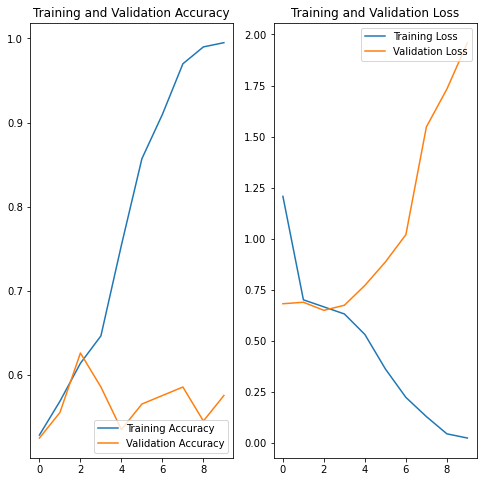

In [15]:
# Plot train accuracy vs validation accuracy and train loss vs validation loss.
train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, validation_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [16]:
# Data augmentation. Adds more diversity by adding images that are randomly flipped, rotated, or zoomed.
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(
        "horizontal", 
        input_shape=(img_height, img_width, 3)
    ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

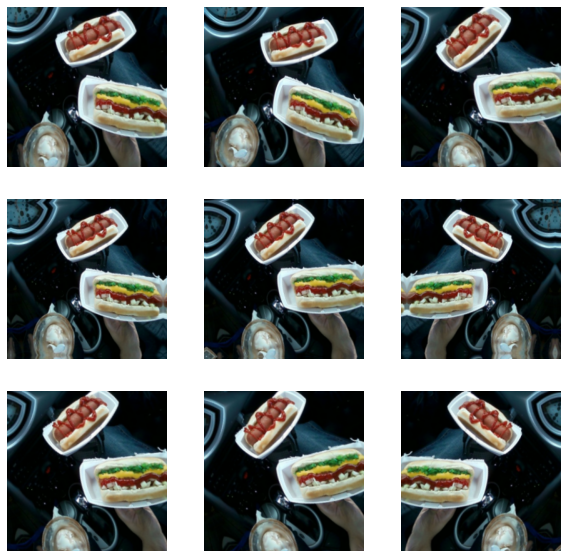

In [17]:
# Example of data augmentation.
plt.figure(figsize=(10, 10))
for images, _ in train_set.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
# Define general convolutional neural network.
num_classes = 2
model = Sequential([
    # Augments image.
    data_augmentation,
    # Rescaling image from [0-255] to [0.0-1.0].
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # 16 output channels (3 -> 16), 3 x 3 kernel size.
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    # 256 x 256 -> 128 x 128
    layers.MaxPooling2D(),
    # 32 output channels (16 -> 32), 3 x 3 kernel size.
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    # 128 x 128 -> 64 x 64
    layers.MaxPooling2D(),
    # 64 output channels (32 -> 64), 3 x 3 kernel size
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    # 64 x 64 -> 32 x 32
    layers.MaxPooling2D(),
    # Randomly drop 20% of output.
    layers.Dropout(0.2),
    # 32 x 32 x 64 -> 65536
    layers.Flatten(),
    # neural network: 65536 -> 128
    layers.Dense(128, activation="relu"),
    # neural network: 128 -> 2
    layers.Dense(num_classes)
])

In [19]:
# Using the same optimizer and loss function.
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

In [21]:
# Fit the data.
epochs = 15
history = model.fit(
  train_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/15
16/16 [==============================] - 8s 483ms/step - loss: 2.4078 - accuracy: 0.5316 - val_loss: 0.6937 - val_accuracy: 0.4848
Epoch 2/15
16/16 [==============================] - 7s 463ms/step - loss: 0.6923 - accuracy: 0.5225 - val_loss: 0.6885 - val_accuracy: 0.6061
Epoch 3/15
16/16 [==============================] - 7s 464ms/step - loss: 0.6888 - accuracy: 0.5835 - val_loss: 0.6726 - val_accuracy: 0.5556
Epoch 4/15
16/16 [==============================] - 7s 457ms/step - loss: 0.6833 - accuracy: 0.5776 - val_loss: 0.6809 - val_accuracy: 0.5657
Epoch 5/15
16/16 [==============================] - 7s 463ms/step - loss: 0.6722 - accuracy: 0.5945 - val_loss: 0.6656 - val_accuracy: 0.5960
Epoch 6/15
16/16 [==============================] - 7s 461ms/step - loss: 0.6715 - accuracy: 0.6005 - val_loss: 0.6770 - val_accuracy: 0.5152
Epoch 7/15
16/16 [==============================] - 7s 463ms/step - loss: 0.6697 - accuracy: 0.5892 - val_loss: 0.6719 - val_accuracy: 0.6869
Epoch 

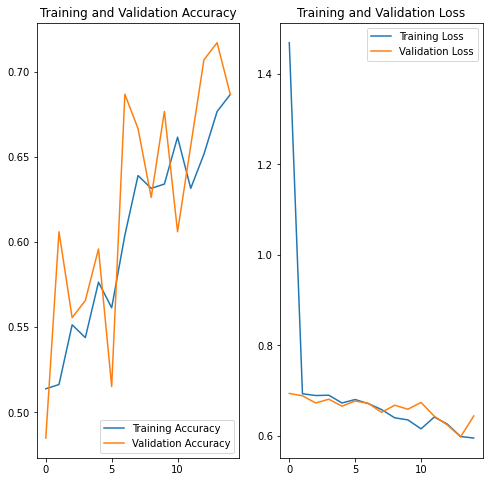

In [22]:
# Plot the accuract and loss (training vs validation).
train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, validation_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

Found 500 files belonging to 2 classes.


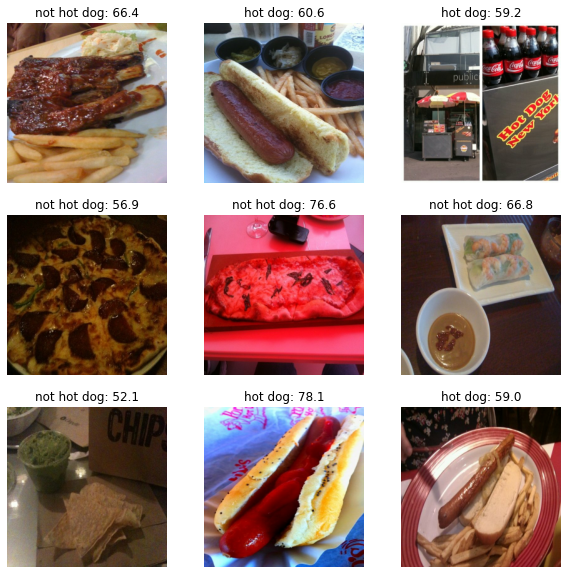

In [23]:
# Test model on test data.
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

plt.figure(figsize=(10, 10))
sample = test_set.shuffle(9).take(1)
for images, labels in sample:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        img_array = keras.preprocessing.image.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        label = label_names[np.argmax(score)]
        
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(label_names[labels[i]] + ": {:.1f}".format(100 * np.max(score)))
        plt.axis("off")

In [24]:
# # Script for extracting hot dog/not hot dog images from https://www.kaggle.com/c/hotdogornot/data.
# for filename in os.listdir("../data2/train/"):
#     if (os.path.isdir("../data2/train/" + filename)):
#         continue
#     if filename.startswith("frankfurter") or filename.startswith("chili-dog") or filename.startswith("hotdog"): 
#         os.rename("../data2/train/" + filename, "../data2/train/hotdog/" + filename)
#     else:
#         os.rename("../data2/train/" + filename, "../data2/train/not_hotdog/" + filename)

In [25]:
# Set training and test data path.
train_dir = pathlib.Path("../data2/train/")
test_dir = pathlib.Path("../data2/test/")

train_count = len(list(train_dir.glob("*/*.jpg")))
test_count = len(list(test_dir.glob("*.jpg")))

print(train_count)
print(test_count)

4530
1150


In [26]:
# Generate training set (80% of training data).
# Resize image to 256 x 256.
batch_size = 100
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4530 files belonging to 2 classes.
Using 3624 files for training.


In [27]:
# Generate validation set (20% of training data.)
# Resize image to 256 x 256.
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4530 files belonging to 2 classes.
Using 906 files for validation.


In [28]:
# Fit the data.
epochs = 10
history = model.fit(
  train_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 106s 3s/step - loss: 0.5516 - accuracy: 0.7092 - val_loss: 0.4720 - val_accuracy: 0.7583
Epoch 2/10
37/37 [==============================] - 86s 2s/step - loss: 0.4910 - accuracy: 0.7536 - val_loss: 0.4400 - val_accuracy: 0.7726
Epoch 3/10
37/37 [==============================] - 103s 3s/step - loss: 0.4696 - accuracy: 0.7652 - val_loss: 0.4165 - val_accuracy: 0.7969
Epoch 4/10
37/37 [==============================] - 105s 3s/step - loss: 0.4460 - accuracy: 0.7759 - val_loss: 0.4162 - val_accuracy: 0.7859
Epoch 5/10
37/37 [==============================] - 106s 3s/step - loss: 0.4312 - accuracy: 0.7842 - val_loss: 0.4033 - val_accuracy: 0.8035
Epoch 6/10
37/37 [==============================] - 109s 3s/step - loss: 0.4230 - accuracy: 0.7881 - val_loss: 0.4039 - val_accuracy: 0.8179
Epoch 7/10
37/37 [==============================] - 118s 3s/step - loss: 0.4213 - accuracy: 0.7895 - val_loss: 0.3889 - val_accuracy: 0.8245
Epoch 8/10
37/

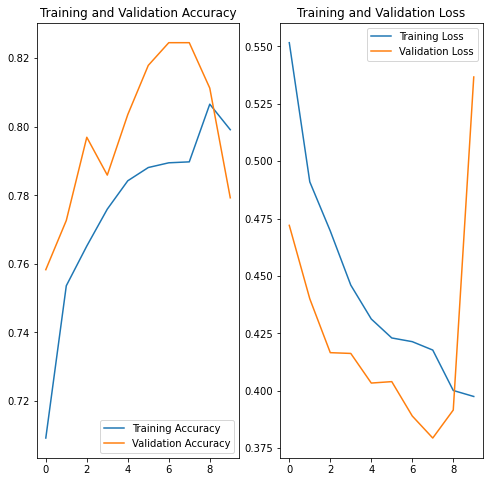

In [29]:
# Plot the accuract and loss (training vs validation).
train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, validation_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

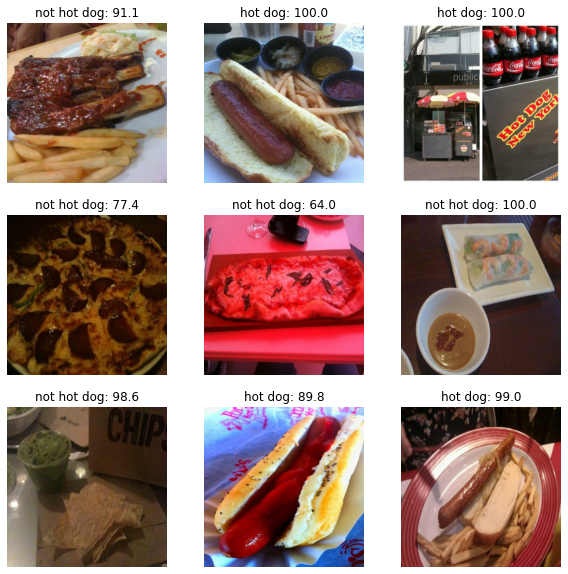

In [30]:
import random

# Test model on test data.
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    random_index = random.randint(0, test_count - 1)
    test_image_path = list(test_dir.glob("*.jpg"))[random_index]
    test_image = PIL.Image.open(test_image_path)
    test_image = test_image.resize((256, 256), 1)
    test_image_array = np.asarray(test_image)
    img_array = tf.expand_dims(test_image_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    label = label_names[np.argmax(score)]

    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(label_names[labels[i]] + ": {:.1f}".format(100 * np.max(score)))
    plt.axis("off")

In [31]:
# Generate tflite file.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\yeryu\AppData\Local\Temp\tmpbwoeyrbp\assets


In [37]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

# Create model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Hot dog classifier"
model_meta.description = "Classify the most prominent object in the image as either a hot dog or not a hot dog."
model_meta.version = "v1"
model_meta.author = "Yehyun Ryu"
model_meta.license = ("Apache License. Version 2.0 http://www.apache.org/licenses/LICENSE-2.0.")
                          
# Create input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.description = "Input image to be classified. The expected image is 256 x 256, with three channels (red, blue, and green) per pixel."
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (_metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (_metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (_metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

 # Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the 2 labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (_metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("./label.txt")
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

# Create subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta]
model_meta.subgraphMetadata = [subgraph]

# Create metadata buffer.
b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

populator = _metadata.MetadataPopulator.with_model_file("./model.tflite")
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["./label.txt"])
populator.populate()

# Validate the output model file by reading the metadata and produce a json file with the metadata under the export path.
displayer = _metadata.MetadataDisplayer.with_model_file("./model.tflite")
json_file = displayer.get_metadata_json()
with open("metadata.json", "w") as f:
    f.write(json_file)